## Data Setup

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point

In [56]:
df = pd.read_csv('/content/database.csv')

In [57]:
df.shape

(23412, 21)

In [58]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [59]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
23407    False
23408    False
23409    False
23410    False
23411    False
Length: 23412, dtype: bool

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [61]:
df.duplicated().sum()

0

In [62]:
df.notna().sum()

Date                          23412
Time                          23412
Latitude                      23412
Longitude                     23412
Type                          23412
Depth                         23412
Depth Error                    4461
Depth Seismic Stations         7097
Magnitude                     23412
Magnitude Type                23409
Magnitude Error                 327
Magnitude Seismic Stations     2564
Azimuthal Gap                  7299
Horizontal Distance            1604
Horizontal Error               1156
Root Mean Square              17352
ID                            23412
Source                        23412
Location Source               23412
Magnitude Source              23412
Status                        23412
dtype: int64

In [63]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


df = df.drop(columns['Depth Error', 'Depth Seismic Stations', 'Magntitude Type', 'Magnitude Seismic Stations', 'Magnitude Error',  'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source'])

In [64]:
columns_todrop = ['Depth Error', 'Depth Seismic Stations', 'Magnitude Type', 'Magnitude Seismic Stations', 'Magnitude Error',  'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source']
df = df.drop(columns=columns_todrop)

print(df)

             Date      Time  Latitude  Longitude        Type   Depth  \
0      01/02/1965  13:44:18   19.2460   145.6160  Earthquake  131.60   
1      01/04/1965  11:29:49    1.8630   127.3520  Earthquake   80.00   
2      01/05/1965  18:05:58  -20.5790  -173.9720  Earthquake   20.00   
3      01/08/1965  18:49:43  -59.0760   -23.5570  Earthquake   15.00   
4      01/09/1965  13:32:50   11.9380   126.4270  Earthquake   15.00   
...           ...       ...       ...        ...         ...     ...   
23407  12/28/2016  08:22:12   38.3917  -118.8941  Earthquake   12.30   
23408  12/28/2016  09:13:47   38.3777  -118.8957  Earthquake    8.80   
23409  12/28/2016  12:38:51   36.9179   140.4262  Earthquake   10.00   
23410  12/29/2016  22:30:19   -9.0283   118.6639  Earthquake   79.00   
23411  12/30/2016  20:08:28   37.3973   141.4103  Earthquake   11.94   

       Magnitude     Status  
0            6.0  Automatic  
1            5.8  Automatic  
2            6.2  Automatic  
3            5.

In [65]:
df = df.drop('Status', axis=1)

In [67]:
df.shape

(23412, 7)

## Data Analysis

In [68]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8


In [69]:
magnitude_bins = [0, 5.4, 6.0, 6.9, 7.9, float('inf')]
magnitude_labels = ['Minor Earthquake', 'Light Earthquake', 'Moderate Earthquake', 'Strong Earthquake', 'Major Earthquake']

df['Magnitude Category'] = pd.cut(df['Magnitude'], bins=magnitude_bins, labels=magnitude_labels, right=False)
print(df)


             Date      Time  Latitude  Longitude        Type   Depth  \
0      01/02/1965  13:44:18   19.2460   145.6160  Earthquake  131.60   
1      01/04/1965  11:29:49    1.8630   127.3520  Earthquake   80.00   
2      01/05/1965  18:05:58  -20.5790  -173.9720  Earthquake   20.00   
3      01/08/1965  18:49:43  -59.0760   -23.5570  Earthquake   15.00   
4      01/09/1965  13:32:50   11.9380   126.4270  Earthquake   15.00   
...           ...       ...       ...        ...         ...     ...   
23407  12/28/2016  08:22:12   38.3917  -118.8941  Earthquake   12.30   
23408  12/28/2016  09:13:47   38.3777  -118.8957  Earthquake    8.80   
23409  12/28/2016  12:38:51   36.9179   140.4262  Earthquake   10.00   
23410  12/29/2016  22:30:19   -9.0283   118.6639  Earthquake   79.00   
23411  12/30/2016  20:08:28   37.3973   141.4103  Earthquake   11.94   

       Magnitude   Magnitude Category  
0            6.0  Moderate Earthquake  
1            5.8     Light Earthquake  
2            6.

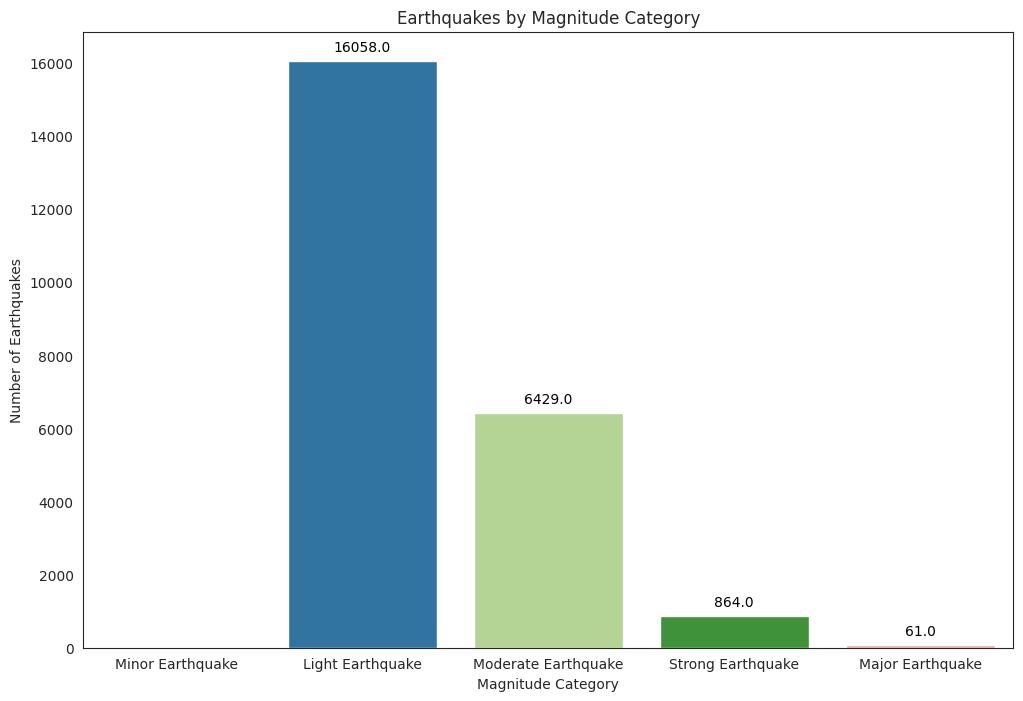

In [70]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='Magnitude Category', data=df, palette='Paired', hue='Magnitude Category', dodge=False)
plt.xlabel('Magnitude Category')
plt.ylabel('Number of Earthquakes')
plt.title('Earthquakes by Magnitude Category')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')
plt.show()

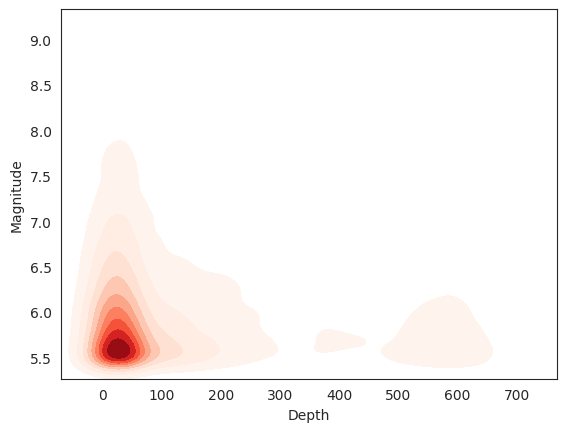

In [71]:
sns.set_style("white")
sns.kdeplot(x=df.Depth, y=df.Magnitude, cmap="Reds", fill=True)

plt.show()

In [73]:
magnitude_counts = df.groupby('Magnitude Category').size().reset_index(name='Count')
print(magnitude_counts)

    Magnitude Category  Count
0     Minor Earthquake      0
1     Light Earthquake  16058
2  Moderate Earthquake   6429
3    Strong Earthquake    864
4     Major Earthquake     61


In [74]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Category
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,Moderate Earthquake
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,Light Earthquake
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,Moderate Earthquake
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,Light Earthquake
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,Light Earthquake


In [75]:
df['Year'] = df['Date'].str.extract('(\d{4})')
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Category,Year
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,Moderate Earthquake,1965
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,Light Earthquake,1965
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,Moderate Earthquake,1965
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,Light Earthquake,1965
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,Light Earthquake,1965


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Date                23412 non-null  object  
 1   Time                23412 non-null  object  
 2   Latitude            23412 non-null  float64 
 3   Longitude           23412 non-null  float64 
 4   Type                23412 non-null  object  
 5   Depth               23412 non-null  float64 
 6   Magnitude           23412 non-null  float64 
 7   Magnitude Category  23412 non-null  category
 8   Year                23412 non-null  object  
dtypes: category(1), float64(4), object(4)
memory usage: 1.5+ MB


In [91]:
df['Year'] = df['Year'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Date                23412 non-null  object  
 1   Time                23412 non-null  object  
 2   Latitude            23412 non-null  float64 
 3   Longitude           23412 non-null  float64 
 4   Type                23412 non-null  object  
 5   Depth               23412 non-null  float64 
 6   Magnitude           23412 non-null  float64 
 7   Magnitude Category  23412 non-null  category
 8   Year                23412 non-null  int64   
dtypes: category(1), float64(4), int64(1), object(3)
memory usage: 1.5+ MB


<ipython-input-117-7ff20f692c25>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


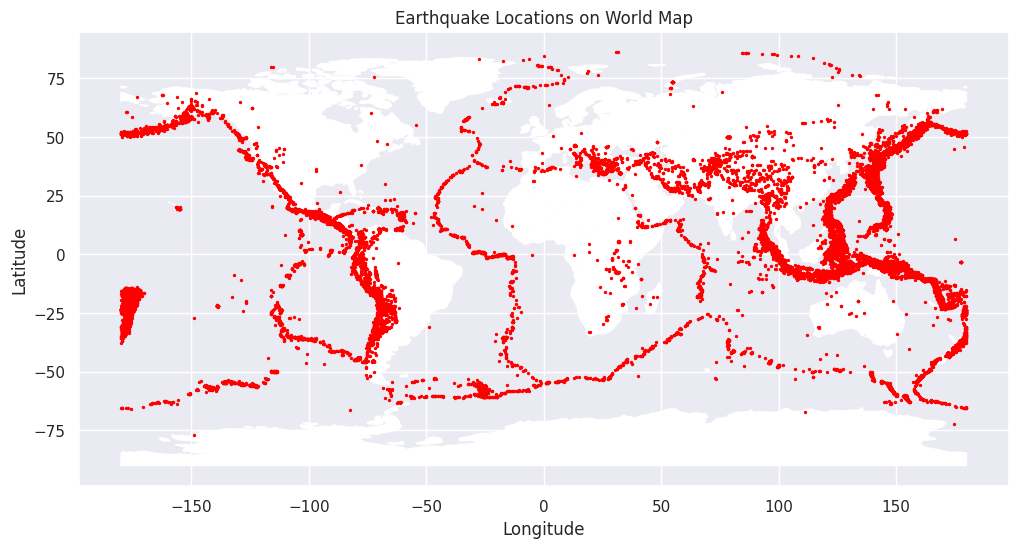

In [117]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(12, 8))
world.plot(ax=ax, color='white')

gdf.plot(ax=ax, marker='o', color='red', markersize=2)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Earthquake Locations on World Map')

plt.show()

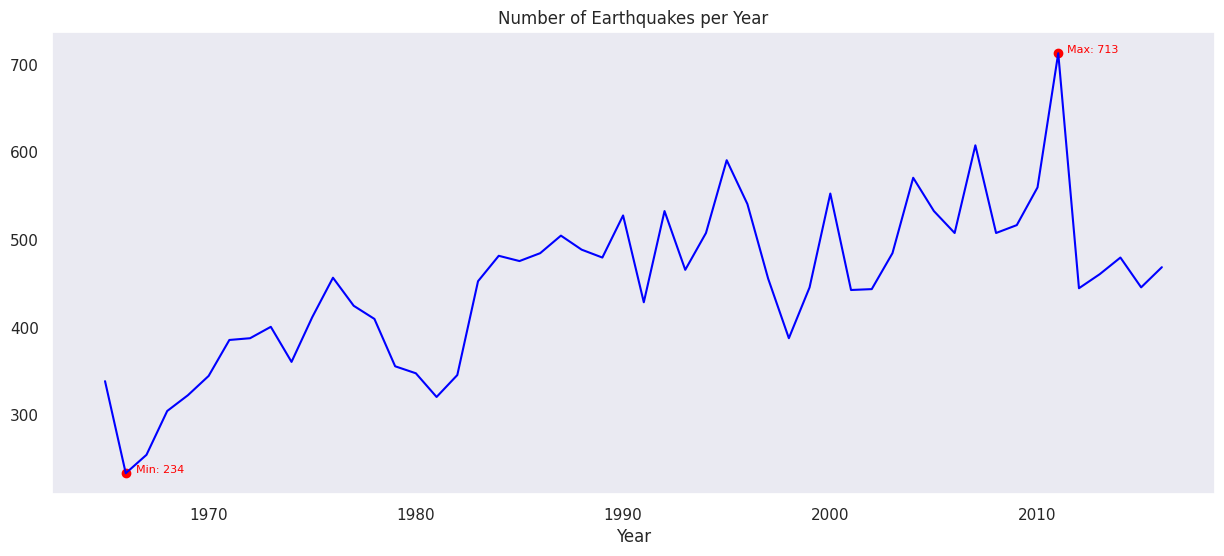

In [139]:
earthquakes_per_year = df.groupby('Year').size().reset_index(name='Number of Earthquakes')

plt.figure(figsize=(15, 6))
plt.plot(earthquakes_per_year['Year'], earthquakes_per_year['Number of Earthquakes'], linestyle='-', color='blue')
plt.xlabel('Year')
plt.title('Number of Earthquakes per Year')
plt.grid(False)

min_year = earthquakes_per_year.loc[earthquakes_per_year['Number of Earthquakes'].idxmin()]
max_year = earthquakes_per_year.loc[earthquakes_per_year['Number of Earthquakes'].idxmax()]

plt.scatter(min_year['Year'], min_year['Number of Earthquakes'], color='red', label='Min Value')
plt.scatter(max_year['Year'], max_year['Number of Earthquakes'], color='red', label='Max Value')

plt.annotate(f'Min: {min_year["Number of Earthquakes"]}',
             (min_year['Year'], min_year['Number of Earthquakes']),
             textcoords="offset points", xytext=(25,0), ha='center', fontsize=8, color='red')

plt.annotate(f'Max: {max_year["Number of Earthquakes"]}',
             (max_year['Year'], max_year['Number of Earthquakes']),
             textcoords="offset points", xytext=(25,0), ha='center', fontsize=8, color='red')

plt.show()


In [140]:
top_10_strongest = df.nlargest(10, 'Magnitude')
print(top_10_strongest)

             Date      Time  Latitude  Longitude        Type  Depth  \
17083  12/26/2004  00:58:53     3.295     95.982  Earthquake   30.0   
20501  03/11/2011  05:46:24    38.297    142.373  Earthquake   29.0   
19928  02/27/2010  06:34:12   -36.122    -72.898  Earthquake   22.9   
16     02/04/1965  05:01:22    51.251    178.715  Earthquake   30.3   
17329  03/28/2005  16:09:37     2.085     97.108  Earthquake   30.0   
21219  04/11/2012  08:38:37     2.327     93.063  Earthquake   20.0   
15440  06/23/2001  20:33:14   -16.265    -73.641  Earthquake   33.0   
18615  09/12/2007  11:10:27    -4.438    101.367  Earthquake   34.0   
12119  10/04/1994  13:22:56    43.773    147.321  Earthquake   14.0   
16446  09/25/2003  19:50:06    41.815    143.910  Earthquake   27.0   

       Magnitude Magnitude Category  Year  
17083        9.1   Major Earthquake  2004  
20501        9.1   Major Earthquake  2011  
19928        8.8   Major Earthquake  2010  
16           8.7   Major Earthquake  1965 

<ipython-input-143-6924648bcbea>:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


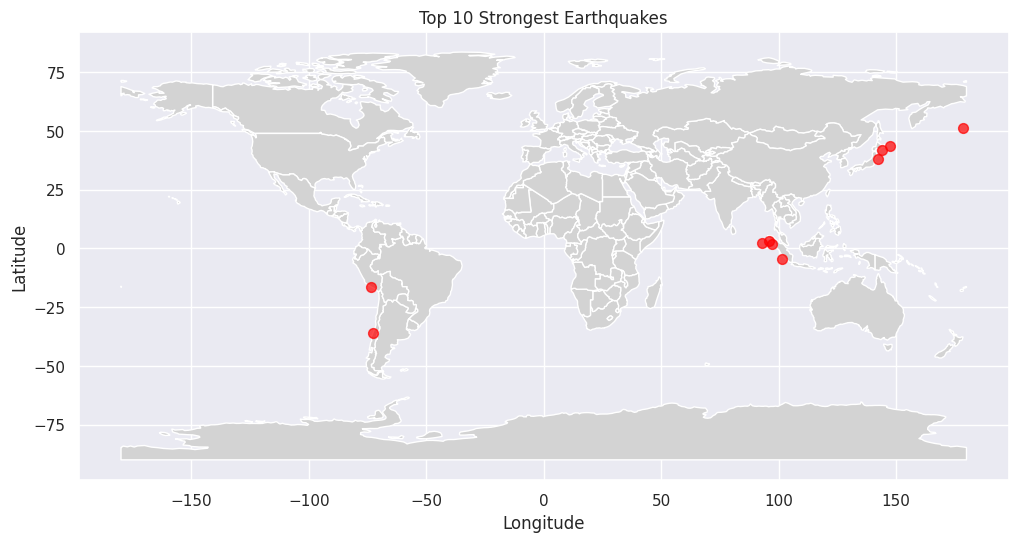

In [143]:
geometry_top_10 = [Point(xy) for xy in zip(top_10_strongest['Longitude'], top_10_strongest['Latitude'])]
gdf_top_10 = gpd.GeoDataFrame(top_10_strongest, geometry=geometry_top_10)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(12, 8))
world.plot(ax=ax, color='lightgrey')

gdf_top_10.plot(ax=ax, marker='o', color='red', markersize=50, alpha=0.7)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Top 10 Strongest Earthquakes')

plt.show()


## Results

From the data analysis conducted above we are able to establish  findings and draw conclusions. The earthquakes were categorized into groups based on magnitude scale; 1-4 minor, 4-5 light, 6-7 moderate,7-8 strong, and 8+ as major earthquakes respectively. We were also able to determine that the most common earthquake category recorded was the light earthquake, with 16058 recorded events since 1965. 1966 was the year with the least recorded earthquakes with 234 whilst 2010 recorded the most with 713 events.

The greatest density of earthquakes occured on the eastern coast of around the pacific ocean, commonly referred to as the San Andreas Fault. Through further analysis we were able to establish the ten strongest earthquakes, with 6 being placed along the San Andreas Fault.

